Importação de bibliotecas

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

Leitura da base de dados

In [3]:
base = pd.read_csv("olympics_dataset.csv")

Visualização e entendimento dos dados

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [8]:
base.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


Tratamento dos dados

In [9]:
base.isnull().sum()

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [11]:
base.duplicated().sum()

np.int64(0)

In [17]:
medalhistasOlimpicos = base[base['Medal'] != 'No medal']
medalhistasOlimpicos

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,37,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,38,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,41,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,42,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...
252551,4979564,Quincy Wilson,M,United States,USA,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Silver
252556,4980004,van Anne,F,Netherlands,NED,2024,Summer,Paris,Athletics,Women's 4 x 400m Relay,Silver
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [19]:
contagemDeMedalhas = medalhistasOlimpicos.groupby(['NOC', 'Medal']).size().unstack(fill_value = 0)
contagemDeMedalhas

Medal,Bronze,Gold,Silver
NOC,,,
AFG,2,0,0
AHO,0,0,1
AIN,1,1,4
ALB,2,0,0
ALG,9,7,4
...,...,...,...
VIE,0,1,3
WIF,5,0,0
YUG,92,130,161


Criação de gráfico dos 5 países mais medalhistas do período

In [22]:
contagemDeMedalhas = contagemDeMedalhas.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)
contagemDeMedalhas

Medal,Bronze,Gold,Silver
NOC,,,
USA,1366,2716,1539
URS,596,832,635
GBR,753,716,813
GER,721,634,613
FRA,660,583,712
...,...,...,...
GUY,1,0,0
IRQ,1,0,0
MON,1,0,0


In [25]:
top5Paises = contagemDeMedalhas.head(5)
top5Paises

Medal,Bronze,Gold,Silver
NOC,,,
USA,1366,2716,1539
URS,596,832,635
GBR,753,716,813
GER,721,634,613
FRA,660,583,712


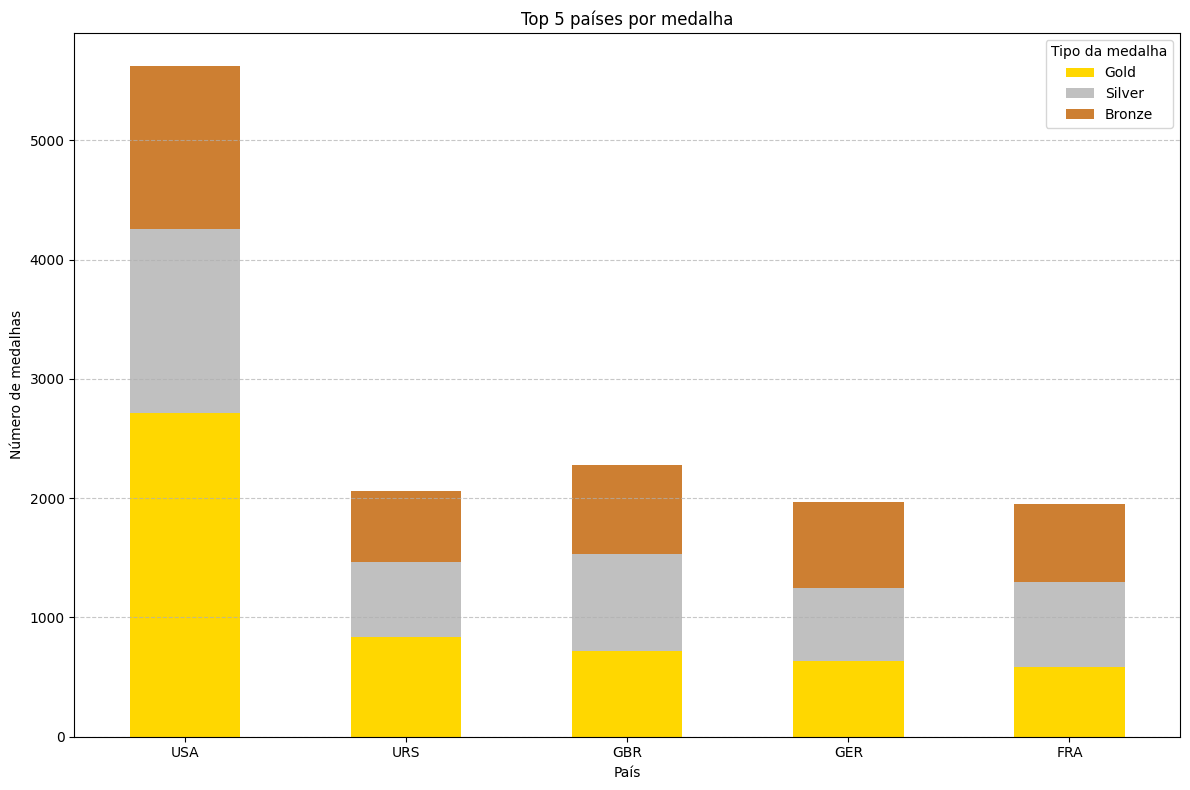

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
cores = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}
top5Paises[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax, color=[cores['Gold'], cores['Silver'], cores['Bronze']])

ax.set_title('Top 5 países por medalha')
ax.set_xlabel('País')
ax.set_ylabel('Número de medalhas')
ax.legend(title='Tipo da medalha')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

10 atletas com mais medalhas

In [27]:
atletasMedalhistas = base[base['Medal'] != 'No medal']
atletasMedalhistas

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,37,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,38,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,41,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,42,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...
252551,4979564,Quincy Wilson,M,United States,USA,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Silver
252556,4980004,van Anne,F,Netherlands,NED,2024,Summer,Paris,Athletics,Women's 4 x 400m Relay,Silver
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [28]:
contagemAtletasMedalhistas = atletasMedalhistas['Name'].value_counts()
top5Atletas = contagemAtletasMedalhistas.head(5)
top5Atletas

Name
Michael Ii           28
Larysa (diriy-)      18
Charles Jr.          16
Nikolay Andrianov    15
Borys Shakhlin       13
Name: count, dtype: int64

C:\Users\jggno\AppData\Local\Temp\ipykernel_10280\3221135297.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(contagemAtletasMedalhistas.index, rotation=45, ha='right')


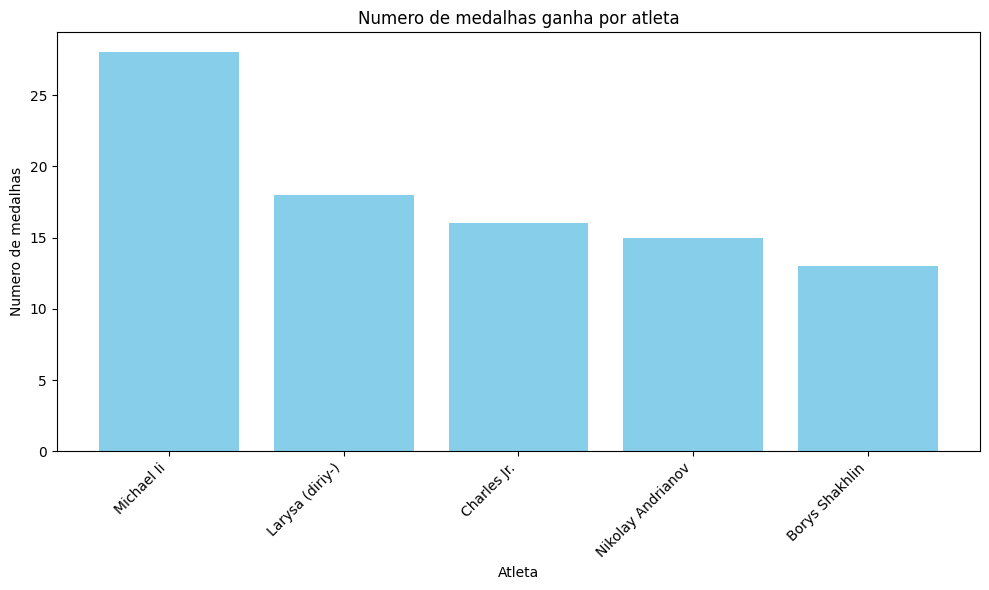

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(top5Atletas.index, top5Atletas.values, color='skyblue')
ax.set_xlabel('Atleta')
ax.set_ylabel('Numero de medalhas')
ax.set_title('Numero de medalhas ganha por atleta')
ax.set_xticklabels(contagemAtletasMedalhistas.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Distribuição de medalhas do país líder(EUA) ao longo do tempo

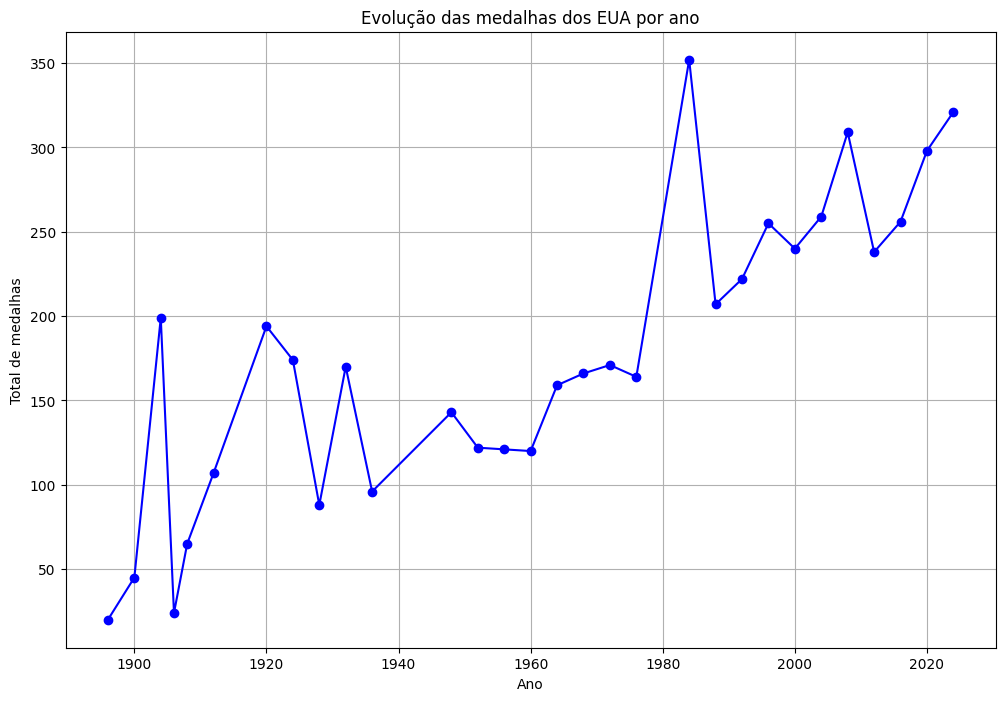

In [30]:
evolucaoEUA = base[(base['Team'] == 'United States') & (base['Medal'] != 'No medal')]
medalhasPorAnoEUA = evolucaoEUA.groupby('Year')['Medal'].count()
plt.figure(figsize=(12, 8))
plt.plot(medalhasPorAnoEUA.index, medalhasPorAnoEUA.values, marker='o', color='blue')
plt.title('Evolução das medalhas dos EUA por ano')
plt.xlabel('Ano')
plt.ylabel('Total de medalhas')
plt.grid(True)
plt.show()

Número de medalhas por cidade sede

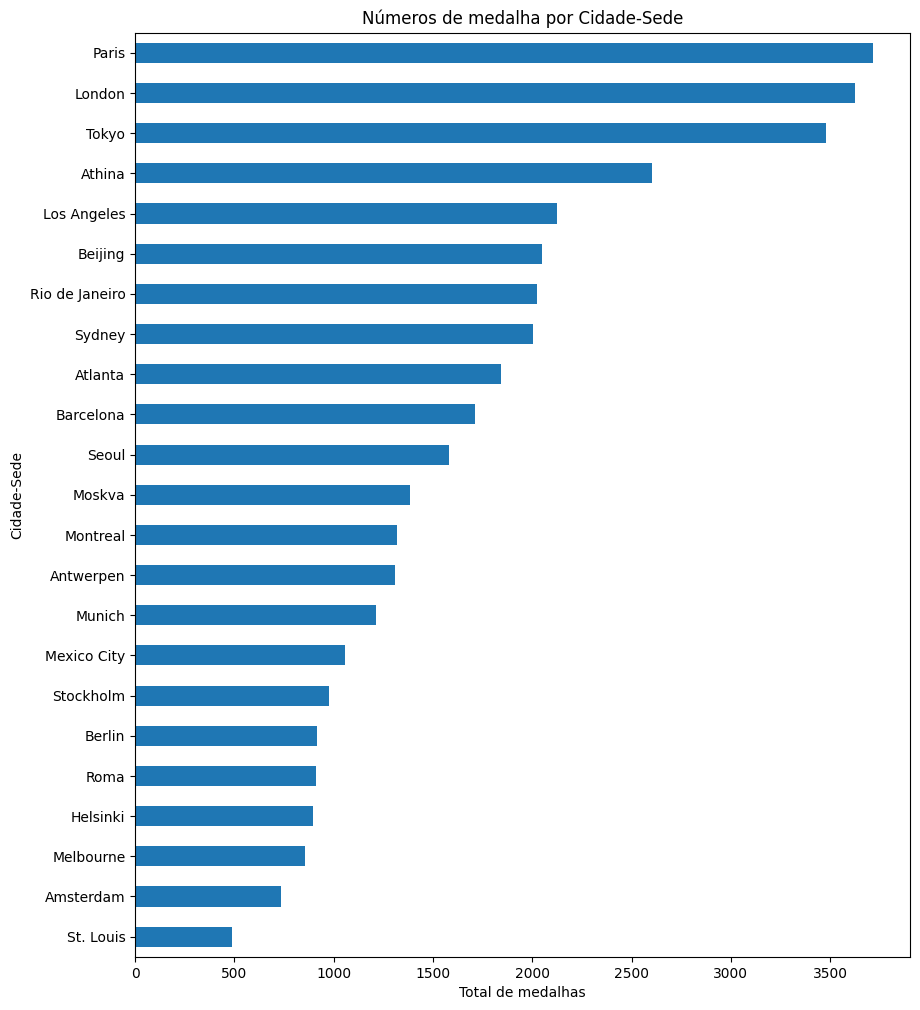

In [33]:
medalhasPorSede = base[base['Medal']!='No medal'].groupby('City')['Medal'].count().sort_values(ascending=True)
medalhasPorSede.plot(kind='barh', figsize=(10, 12))
plt.title('Números de medalha por Cidade-Sede')
plt.xlabel('Total de medalhas')
plt.ylabel('Cidade-Sede')
plt.show()

Linha de evolução de medalhas por Sexo

In [37]:
evolucaoPorSexo = atletasMedalhistas.groupby(['Year' ,'Sex'])['Medal'].count().reset_index()
evolucaoPorSexo

,Year,Sex,Medal
0,1896,M,143
1,1900,F,13
2,1900,M,591
3,1904,F,10
4,1904,M,476
...,...,...,...
56,2016,M,1054
57,2020,F,1208
58,2020,M,1241
59,2024,F,1147


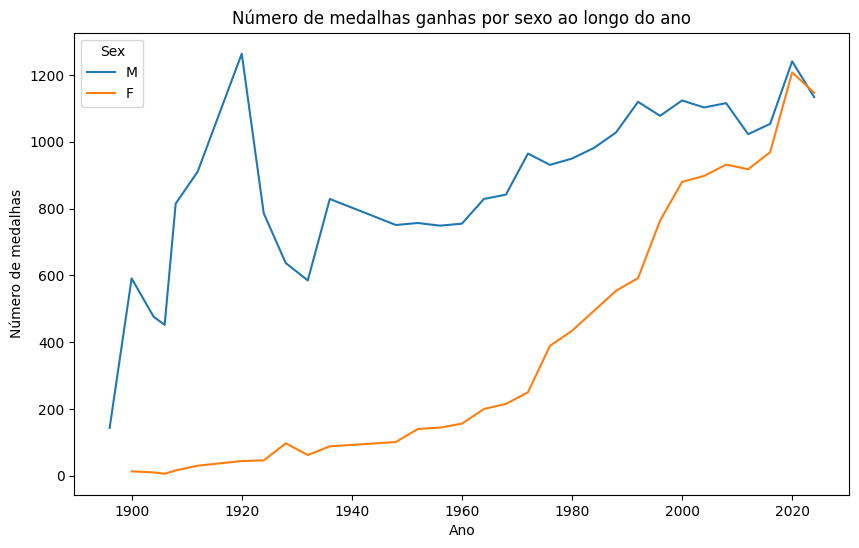

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=evolucaoPorSexo, x='Year', y='Medal', hue='Sex')
plt.title('Número de medalhas ganhas por sexo ao longo do ano')
plt.xlabel('Ano')
plt.ylabel('Número de medalhas')
plt.show()